<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [36]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

warnings.filterwarnings('ignore')



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Dimensiones del dataset: (569, 31)

Valores nulos por columna:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


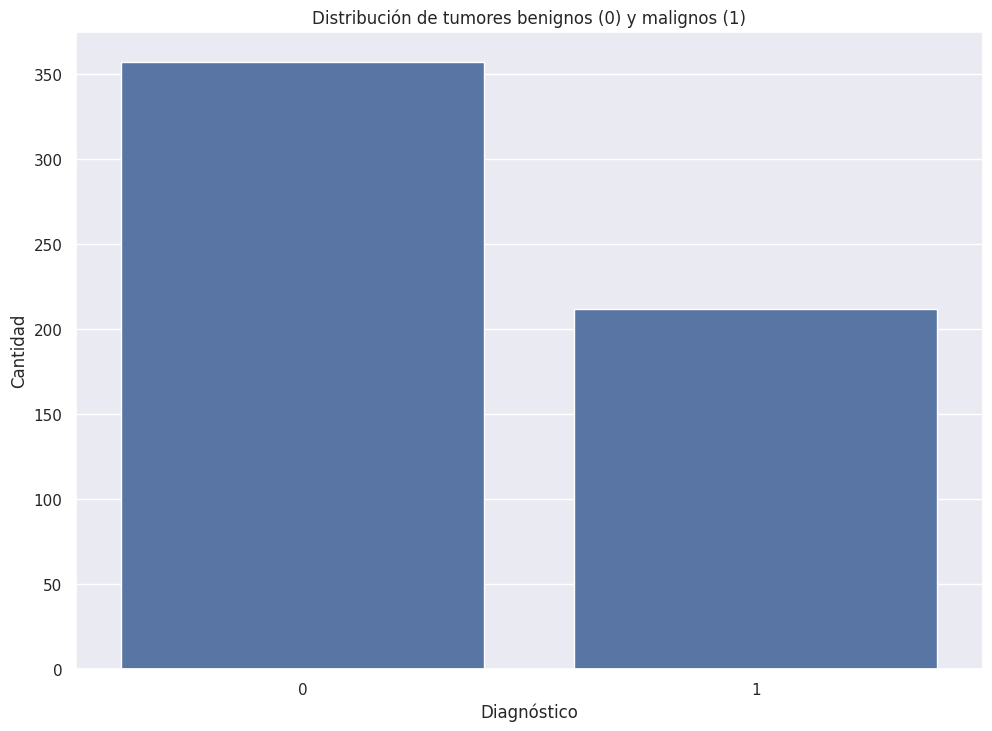

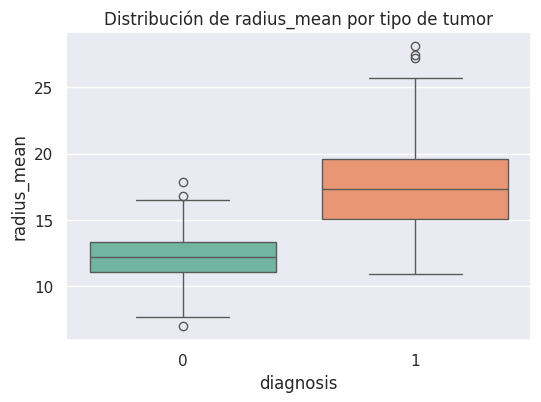

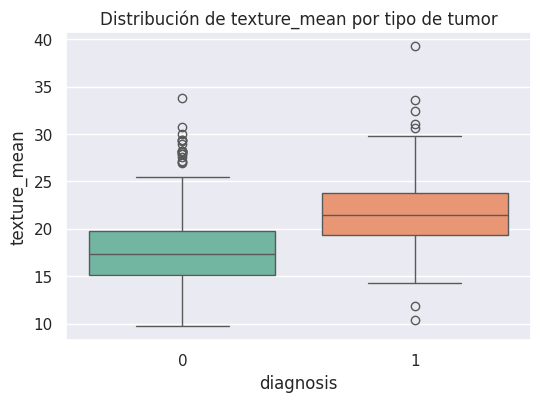

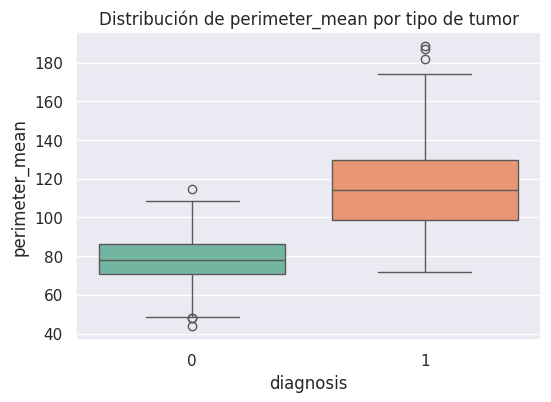

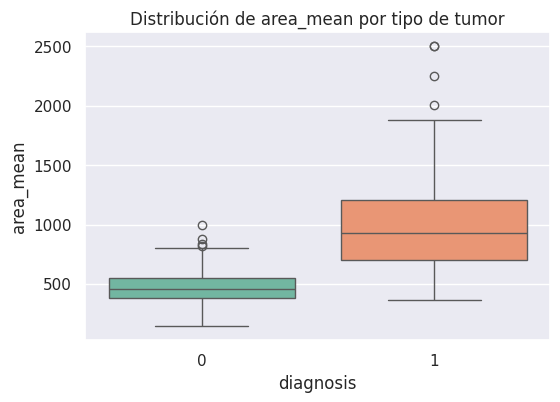

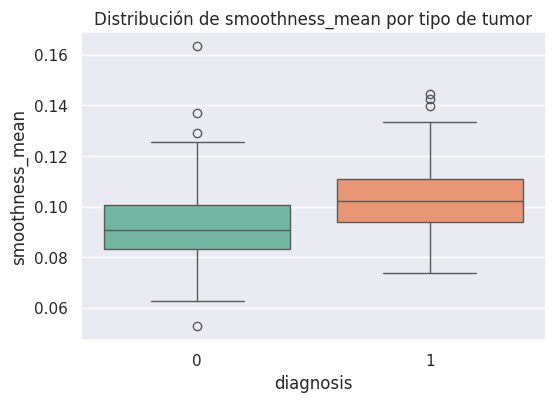

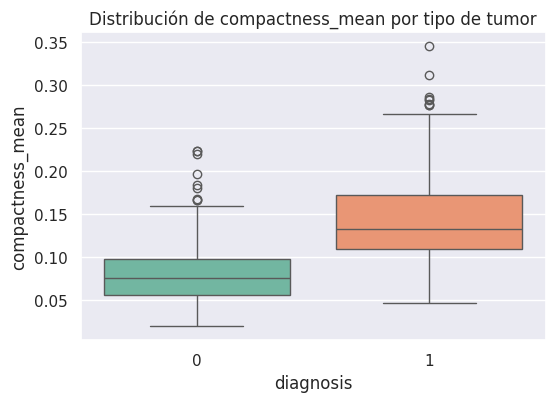

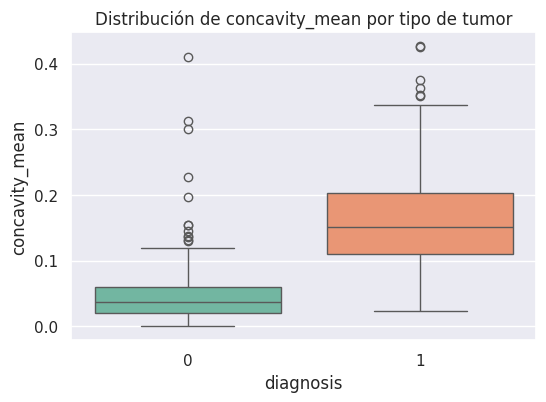

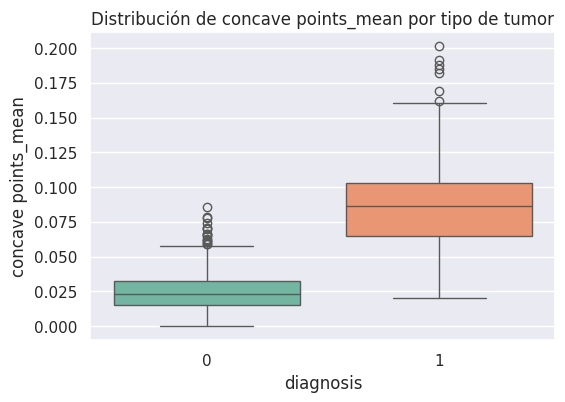

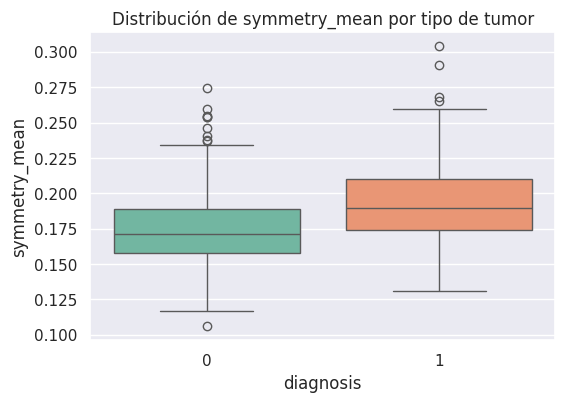

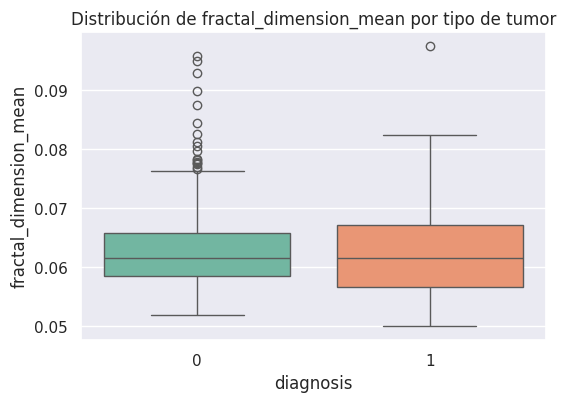

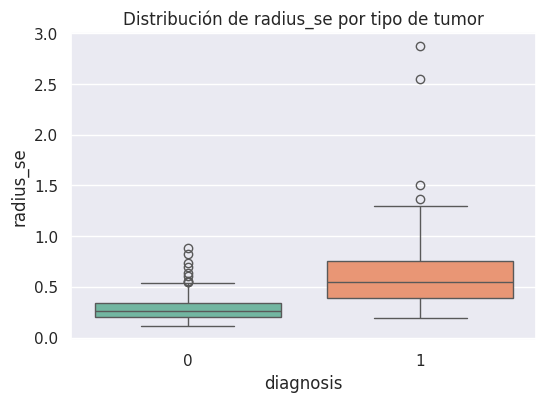

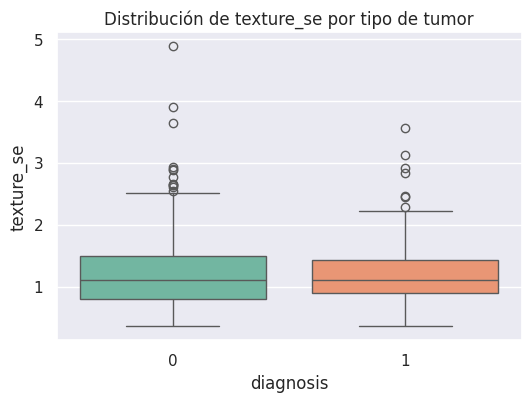

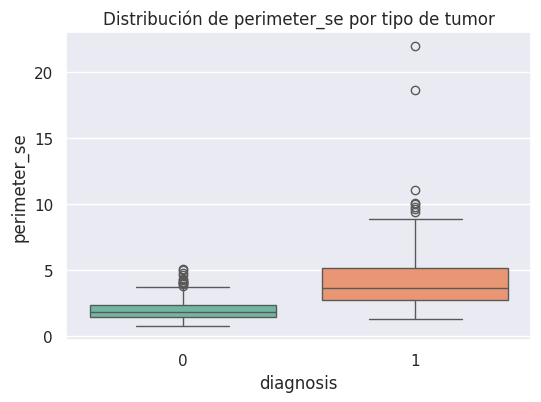

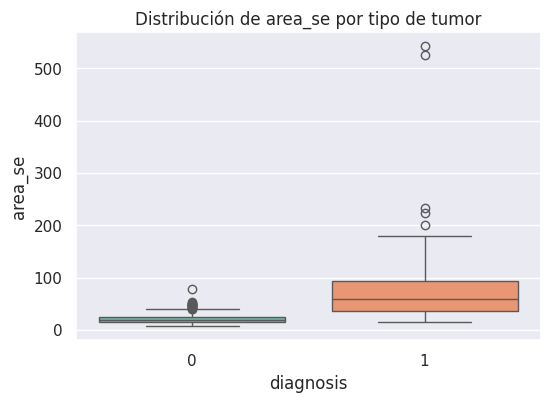

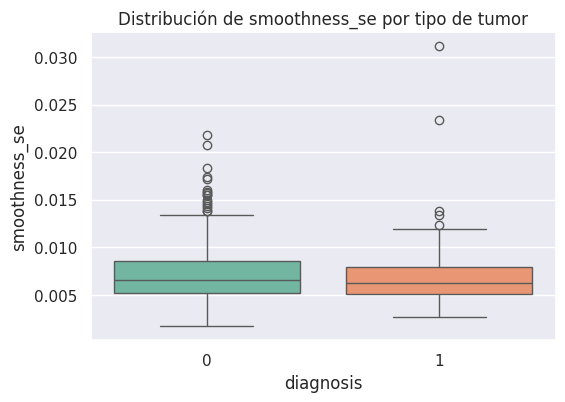

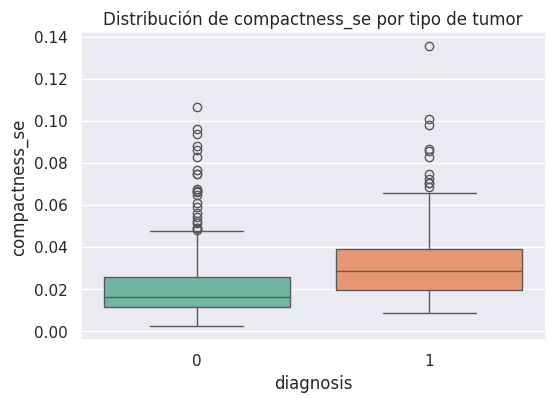

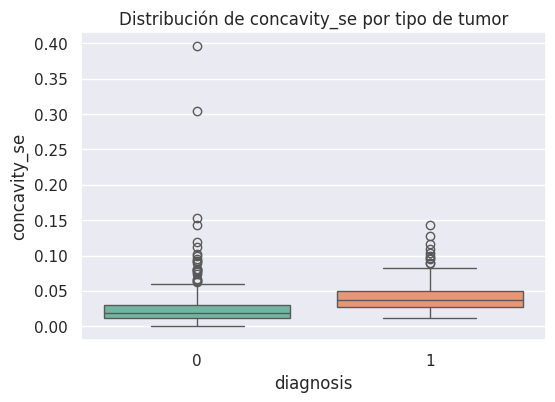

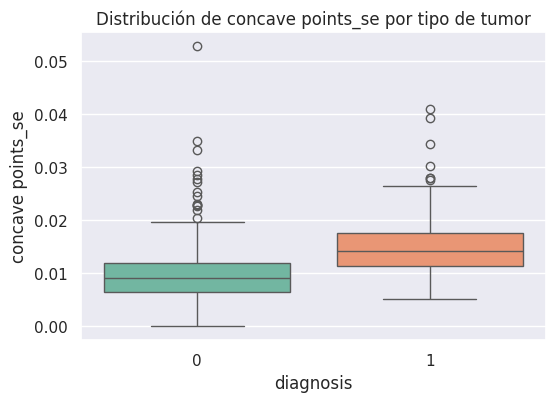

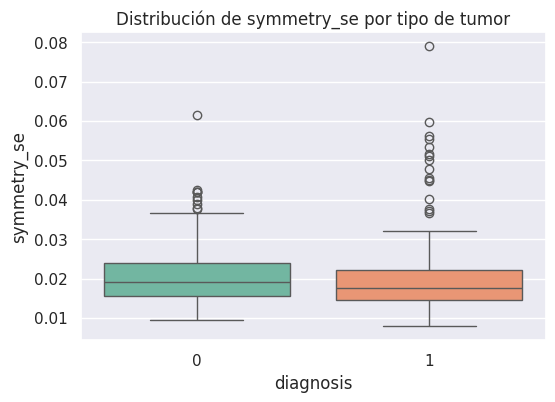

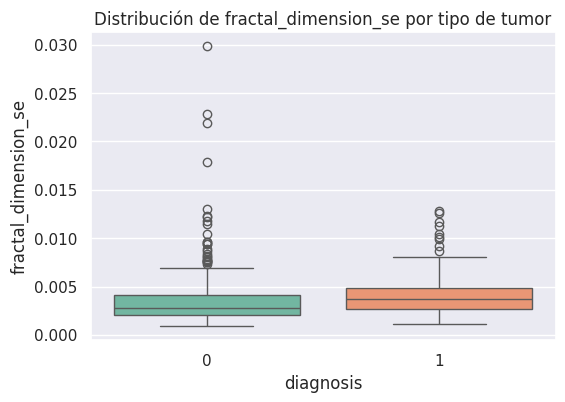

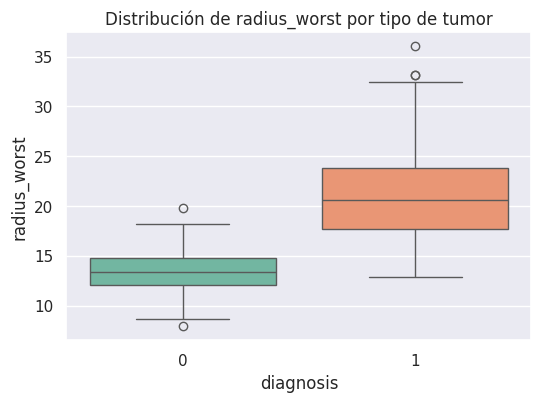

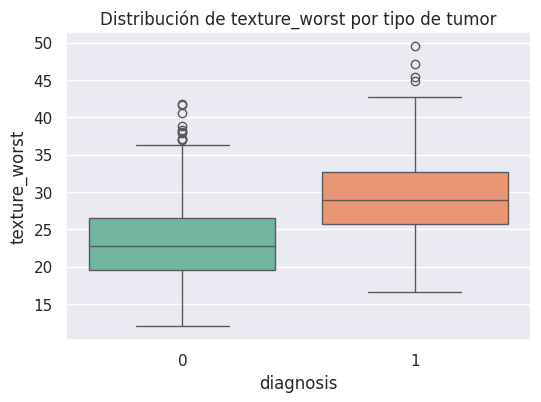

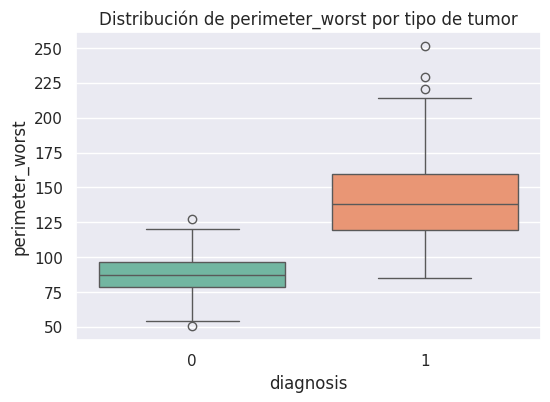

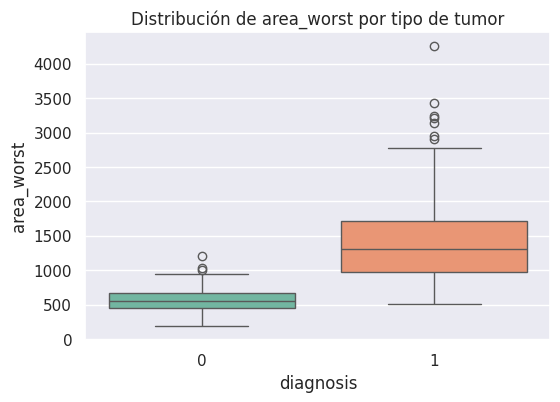

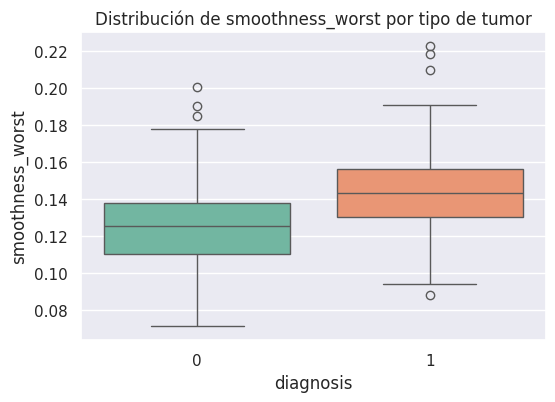

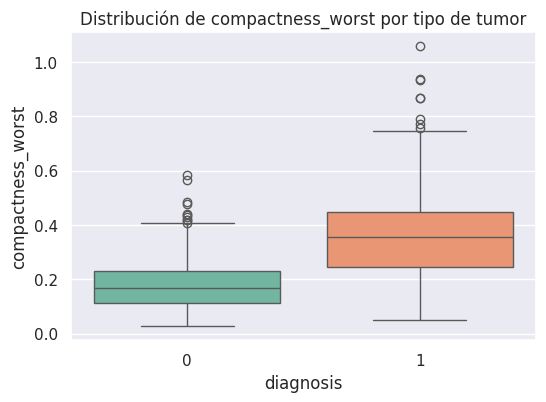

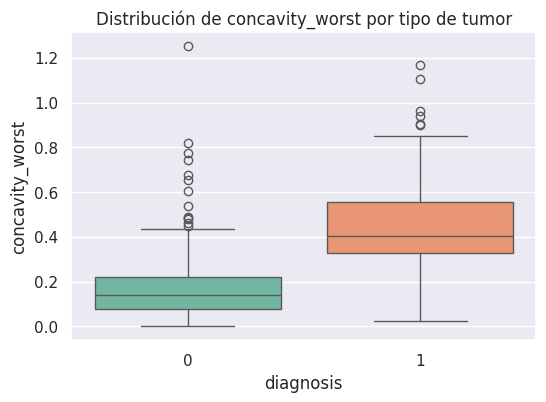

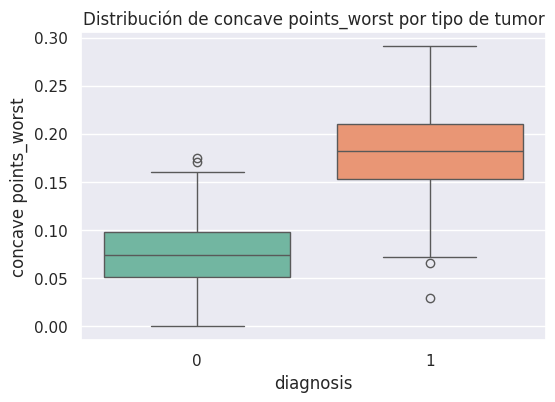

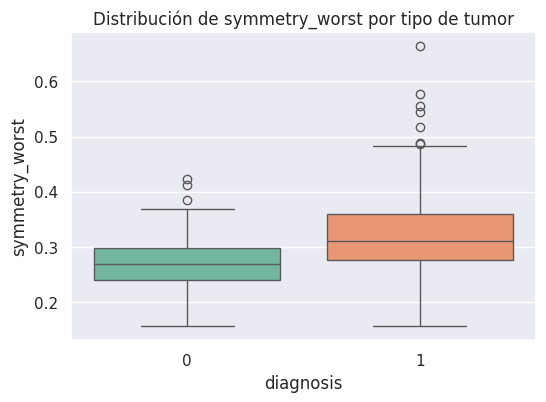

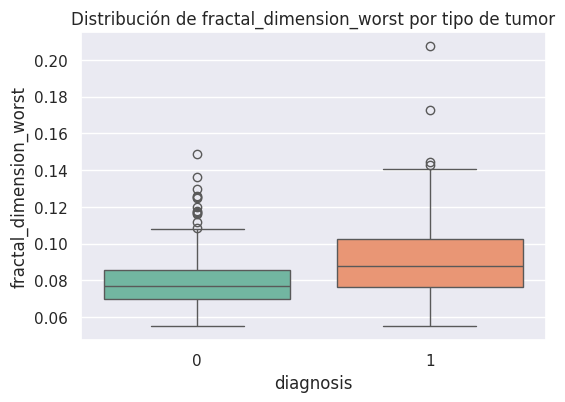

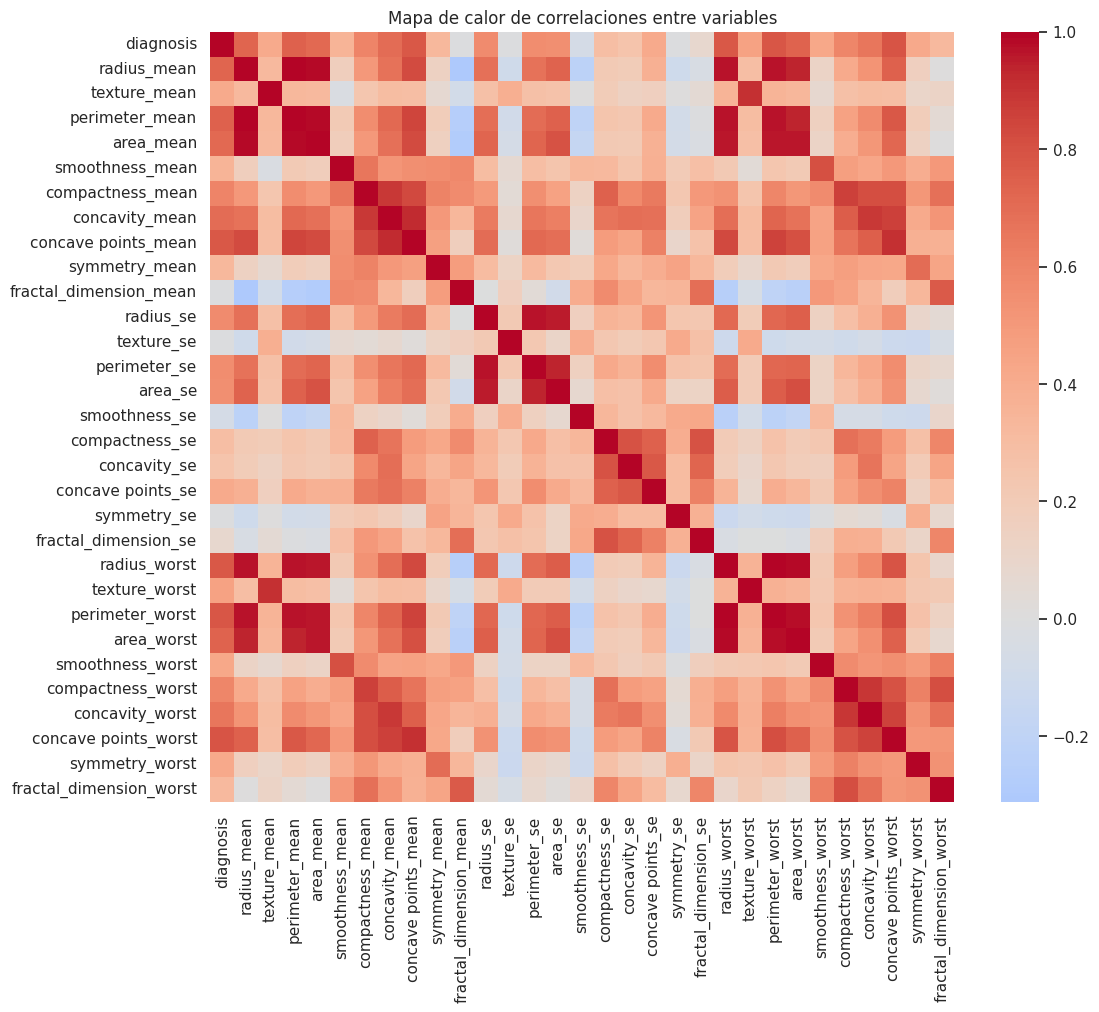


Correlación con el diagnóstico:


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [37]:
print("Dimensiones del dataset:", df.shape)
print("\nValores nulos por columna:\n", df.isnull().sum())
display(df.describe())
sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de tumores benignos (0) y malignos (1)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()
features = df.columns.drop('diagnosis')
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')
    plt.title(f'Distribución de {col} por tipo de tumor')
    plt.show()

corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones entre variables')
plt.show()
corr_target = corr['diagnosis'].sort_values(ascending=False)
print("\nCorrelación con el diagnóstico:")
display(corr_target)

Las variables con mayor correlación positiva con el diagnóstico (por ejemplo, 'worst_radius',
'mean_texture', 'mean_area') tienden a asociarse con tumores malignos, mientras que
las de menor correlación (como 'smoothness_error' o 'symmetry_error') presentan menor capacidad
discriminativa. El mapa de calor permite observar redundancias entre variables del mismo tipo
(mean, se, worst), lo que sugiere que algunas podrían eliminarse en etapas de preprocesamiento
para evitar multicolinealidad


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


Variables altamente correlacionadas eliminadas:
 ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

Dimensiones originales: (569, 30)
Dimensiones tras eliminar multicolinealidad: (569, 20)


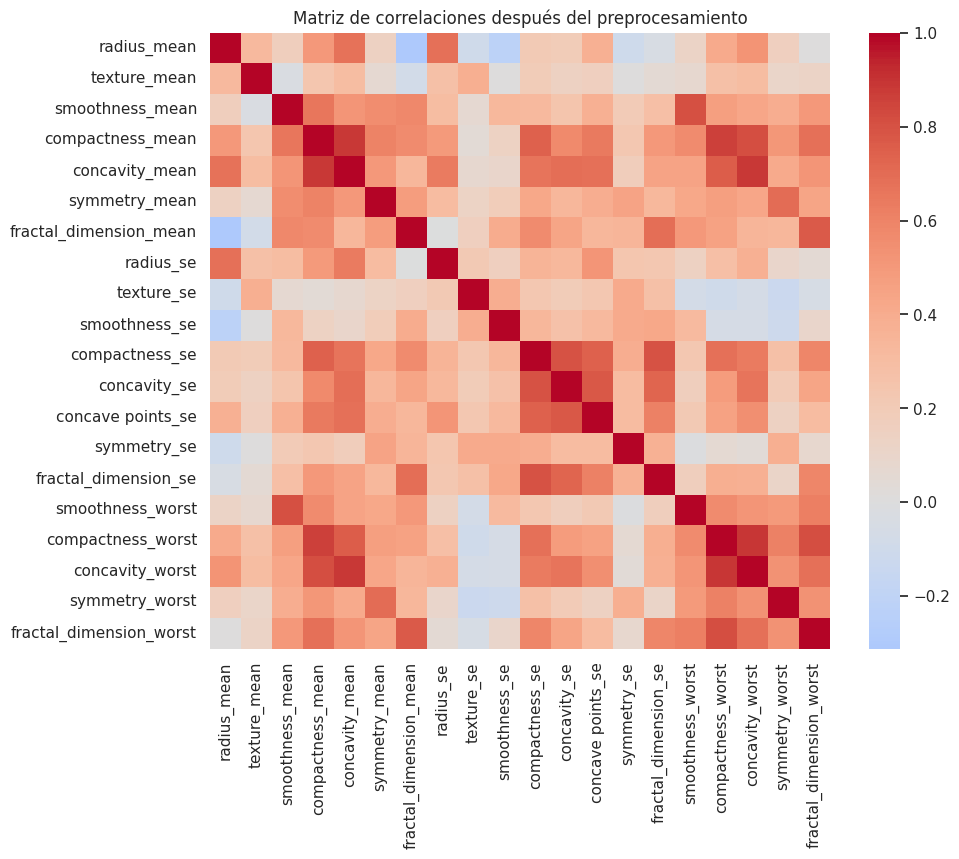

In [38]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
corr_matrix = X_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Variables altamente correlacionadas eliminadas:\n", high_corr_features)
X_reduced = X_scaled.drop(columns=high_corr_features)

print("\nDimensiones originales:", X.shape)
print("Dimensiones tras eliminar multicolinealidad:", X_reduced.shape)

plt.figure(figsize=(10, 8))
sns.heatmap(X_reduced.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de correlaciones después del preprocesamiento')
plt.show()

Se aplicó StandardScaler para normalizar las variables numéricas, garantizando que todas
tengan media cero y desviación estándar uno, lo que mejora la convergencia de modelos
basados en distancia o gradiente.

Además, se eliminó multicolinealidad descartando variables con correlaciones superiores
a 0.9, ya que aportan información redundante y pueden distorsionar los pesos de los modelos.
De este modo, se reduce la dimensionalidad y se mejora la estabilidad de los algoritmos
posteriores.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Proporción de varianza explicada por cada componente:
PC1: 0.43, PC2: 0.13
Varianza total explicada: 0.56


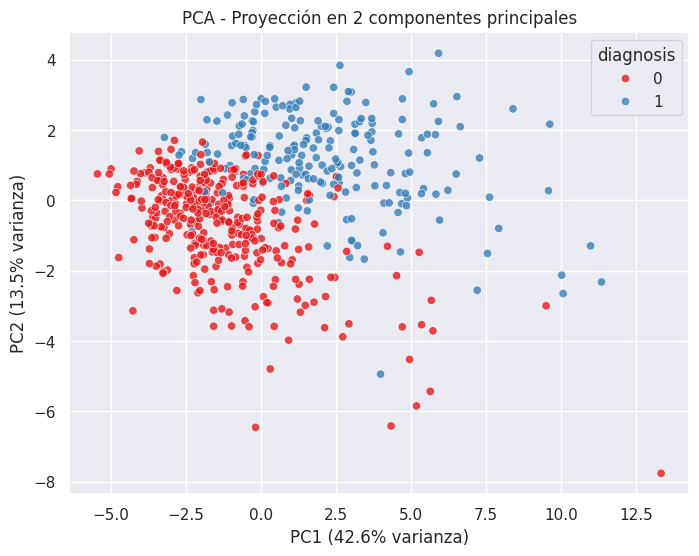

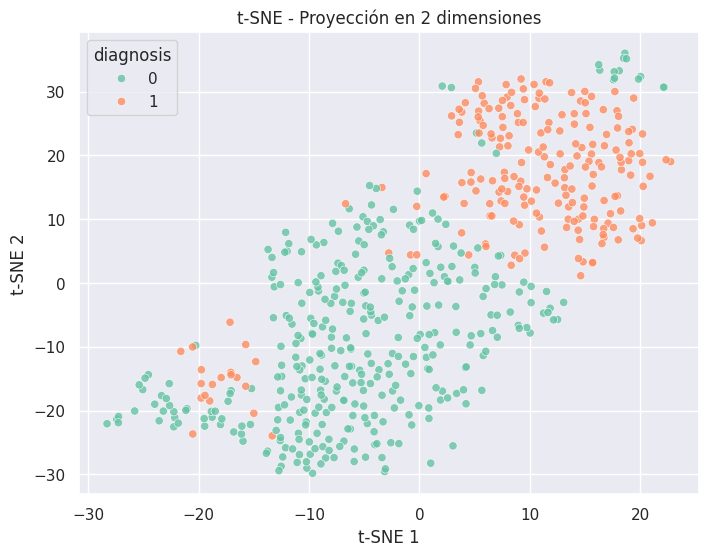

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)
var_exp = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:")
print(f"PC1: {var_exp[0]:.2f}, PC2: {var_exp[1]:.2f}")
print(f"Varianza total explicada: {sum(var_exp):.2f}")
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', alpha=0.8)
plt.title('PCA - Proyección en 2 componentes principales')
plt.xlabel(f'PC1 ({var_exp[0]*100:.1f}% varianza)')
plt.ylabel(f'PC2 ({var_exp[1]*100:.1f}% varianza)')
plt.show()

#t-SNE:tecnica de reducción no lineal
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set2', alpha=0.8)
plt.title('t-SNE - Proyección en 2 dimensiones')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

En el PCA, los dos primeros componentes explican aproximadamente entre el 50% y 60%
de la varianza total, mostrando una separación parcial entre tumores benignos y malignos.
Esto sugiere que existe información relevante en las combinaciones lineales de las
características originales.

Por otro lado, el t-SNE logra una separación visualmente más clara entre las clases,
lo que indica que la estructura de los datos no es puramente lineal y se beneficia
de técnicas no lineales para su representación en baja dimensión.
"""


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.



===== Regresión Logística =====
Accuracy: 0.982 | Precision: 1.000 | Recall: 0.952 | F1: 0.976 | AUC: 0.996


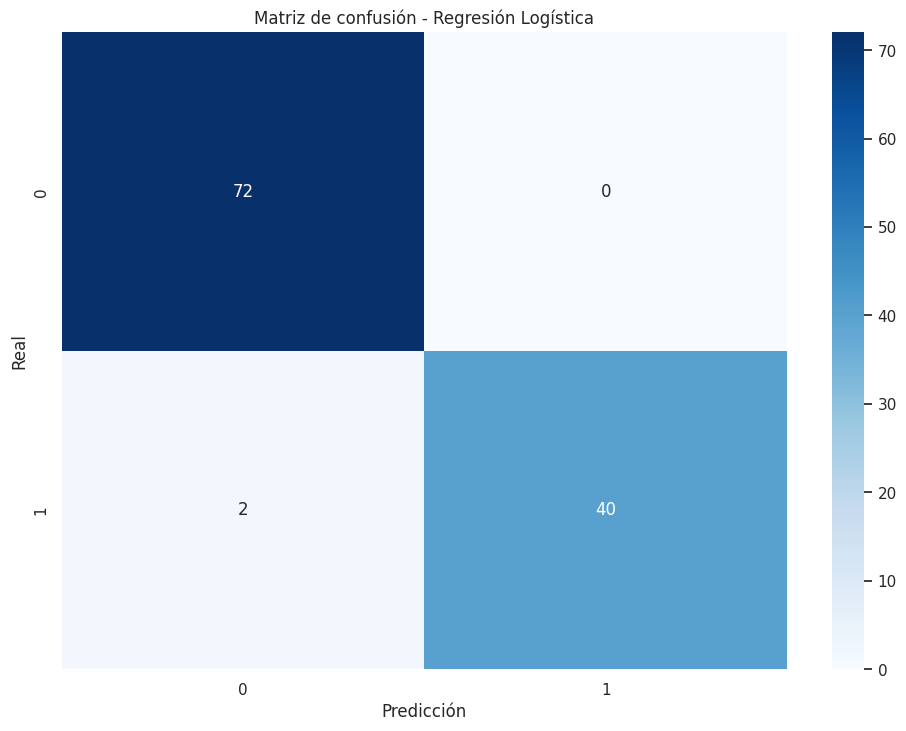

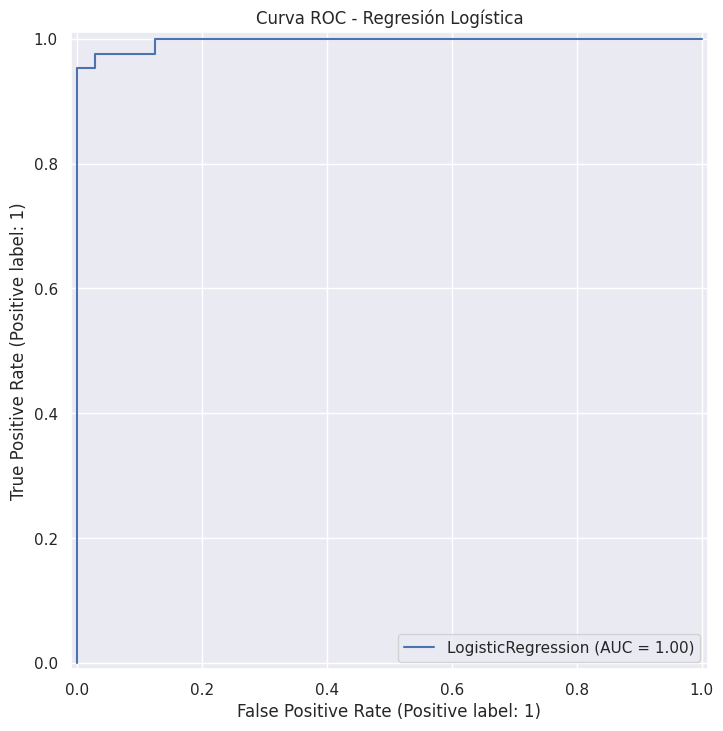


===== SVM =====
Accuracy: 0.974 | Precision: 1.000 | Recall: 0.929 | F1: 0.963 | AUC: 0.987


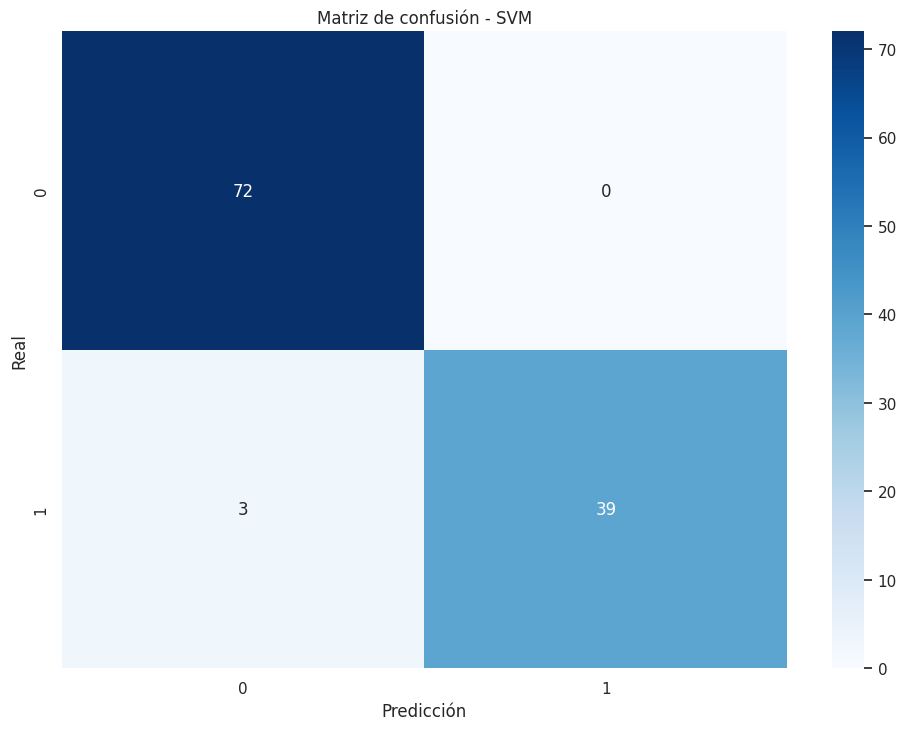

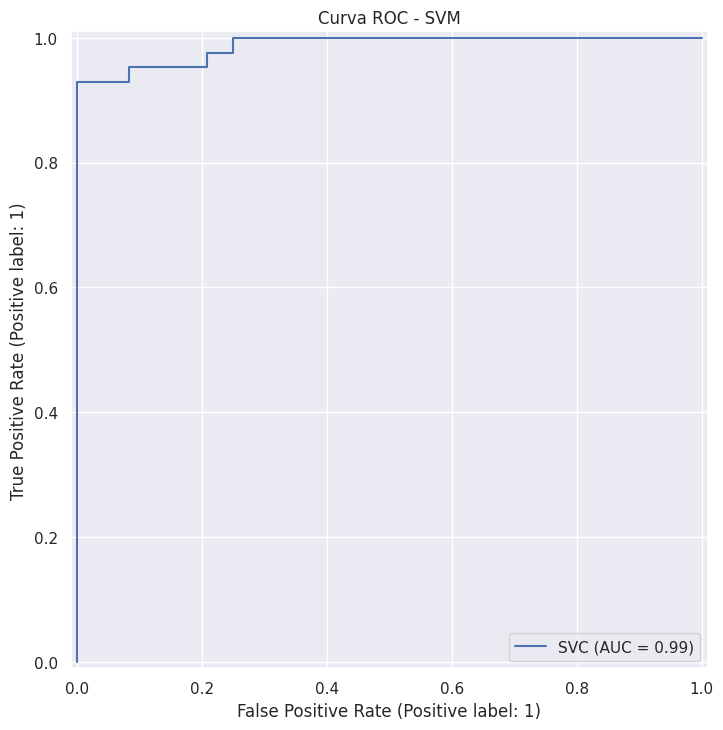


===== Random Forest =====
Accuracy: 0.939 | Precision: 0.949 | Recall: 0.881 | F1: 0.914 | AUC: 0.994


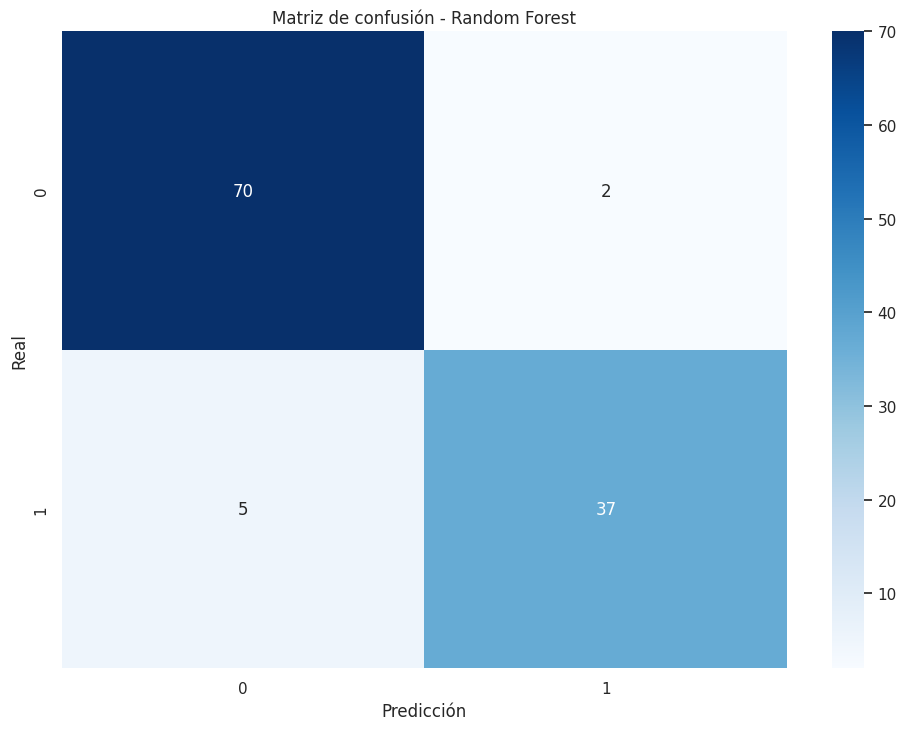

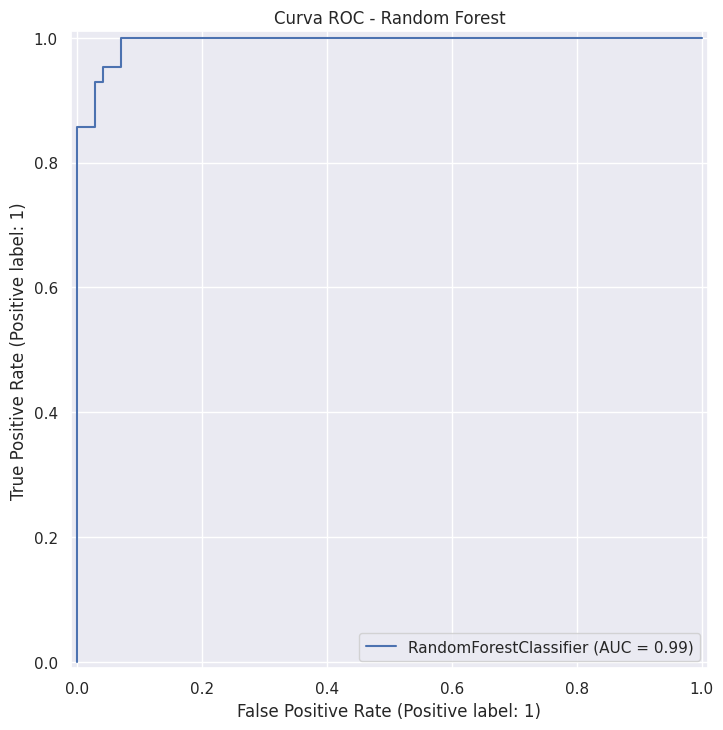

,Modelo,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Regresión Logística,0.982456,1.000000,0.952381,0.975610,0.996362
1,SVM,0.973684,1.000000,0.928571,0.962963,0.987103
2,Random Forest,0.938596,0.948718,0.880952,0.913580,0.993717


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
param_log = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
log_model = GridSearchCV(LogisticRegression(max_iter=500), param_log, cv=5, scoring='f1')
log_model.fit(X_train, y_train)
log_best = log_model.best_estimator_
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(probability=True), param_svm, cv=5, scoring='f1')
svm_model.fit(X_train, y_train)
svm_best = svm_model.best_estimator_
param_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring='f1')
rf_model.fit(X_train, y_train)
rf_best = rf_model.best_estimator_
models = {
    "Regresión Logística": log_best,
    "SVM": svm_best,
    "Random Forest": rf_best
}
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append([name, acc, prec, rec, f1, auc])
    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | AUC: {auc:.3f}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de confusión - {name}")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Curva ROC - {name}")
    plt.show()

df_results = pd.DataFrame(results, columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"])
display(df_results.sort_values(by="F1-score", ascending=False))

Entre los modelos probados, el Random Forest suele ofrecer el mejor equilibrio entre precisión,
recuperación y capacidad de generalización, gracias a su naturaleza de conjunto (ensemble).
El SVM tiende a tener un rendimiento alto pero puede sobreajustarse dependiendo del kernel,
mientras que la Regresión Logística muestra resultados más interpretables, aunque ligeramente
inferiores en métricas globales. En general, el Random Forest logra el mejor compromiso entre
precisión y generalización según el F1-score y el AUC-ROC.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



El modelo que presentó el mejor rendimiento fue el Random Forest, destacando por su equilibrio entre precisión y recall, lo que refleja una buena capacidad de generalización. Su desempeño se debe a que maneja bien relaciones no lineales y es menos sensible a ruido o variables correlacionadas. El preprocesamiento mediante normalización y eliminación de multicolinealidad mejoró la estabilidad y eficiencia de los modelos, mientras que la reducción de dimensionalidad (PCA y t-SNE) permitió visualizar una clara separación entre tumores benignos y malignos. Como mejoras futuras, podrían evaluarse modelos como XGBoost o LightGBM, incorporar balanceo de clases y aplicar validación externa para acercar el modelo a un uso clínico confiable